In [ ]:
## To Predict whether the person is diabetic or not
## preg - pregnancy
# Plas- Plasma
# Pres- Pressure
# Skin- Skin Thickness
#Test- Insulin
# mass - BMI
# pedi -pdf (pedigree mass function)

In [ ]:
#### Steps to perform
# rename the columns 
# EDA
# Univariate Analysis
# checking skewness for each variable
# Bivariate Analysis --> pairplot, correlation matrix
# Handling missing values
# Handling Duplicate date
# Handling outliers
# one hot encoding or label encoding for categorical data
# Splitting data into train and test
# Applying regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [2]:
df=pd.read_csv("pima-indians-diabetes .csv")

In [3]:
df.sample(5)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
28,13,145,82,19,110,22.2,0.245,57,0
358,12,88,74,40,54,35.3,0.378,48,0
430,2,99,0,0,0,22.2,0.108,23,0
644,3,103,72,30,152,27.6,0.730,27,0
432,1,80,74,11,60,30.0,0.527,22,0


In [4]:
df=df.rename(columns={"Preg":"Pregnancy","Plas":"Plasma","Pres":"Pressure","skin":"Skin_thickness","test":"Insulin","mass":"BMI","pedi":"PMF"})

In [5]:
df.sample(5)

,Pregnancy,Plasma,Pressure,Skin_thickness,Insulin,BMI,PMF,age,class
307,0,137,68,14,148,24.8,0.143,21,0
728,2,175,88,0,0,22.9,0.326,22,0
688,1,140,74,26,180,24.1,0.828,23,0
631,0,102,78,40,90,34.5,0.238,24,0
115,4,146,92,0,0,31.2,0.539,61,1


# EDA

In [6]:
df.shape

(768, 9)

In [7]:
df.dtypes
## There is no object column. All columns are either int or float

Pregnancy           int64
Plasma              int64
Pressure            int64
Skin_thickness      int64
Insulin             int64
BMI               float64
PMF               float64
age                 int64
class               int64
dtype: object

In [8]:
df.isnull().sum()
## no null values

Pregnancy         0
Plasma            0
Pressure          0
Skin_thickness    0
Insulin           0
BMI               0
PMF               0
age               0
class             0
dtype: int64

# There are no missing values in the dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pregnancy       768 non-null    int64  
 1   Plasma          768 non-null    int64  
 2   Pressure        768 non-null    int64  
 3   Skin_thickness  768 non-null    int64  
 4   Insulin         768 non-null    int64  
 5   BMI             768 non-null    float64
 6   PMF             768 non-null    float64
 7   age             768 non-null    int64  
 8   class           768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.describe(include="all")

,Pregnancy,Plasma,Pressure,Skin_thickness,Insulin,BMI,PMF,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Univariate Analysis

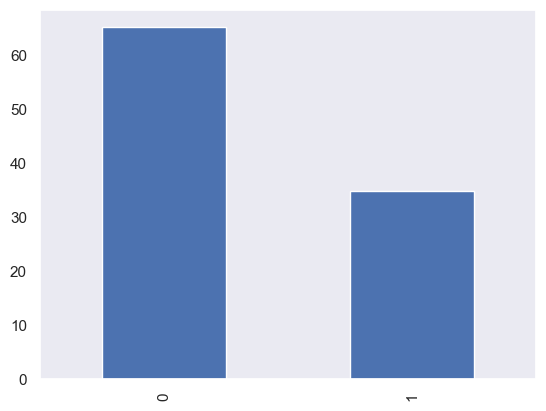

In [28]:
df["class"].value_counts(normalize=True).mul(100).plot(kind="bar")
plt.show()
## In the exsting data, more than 60% of data is not diabetic

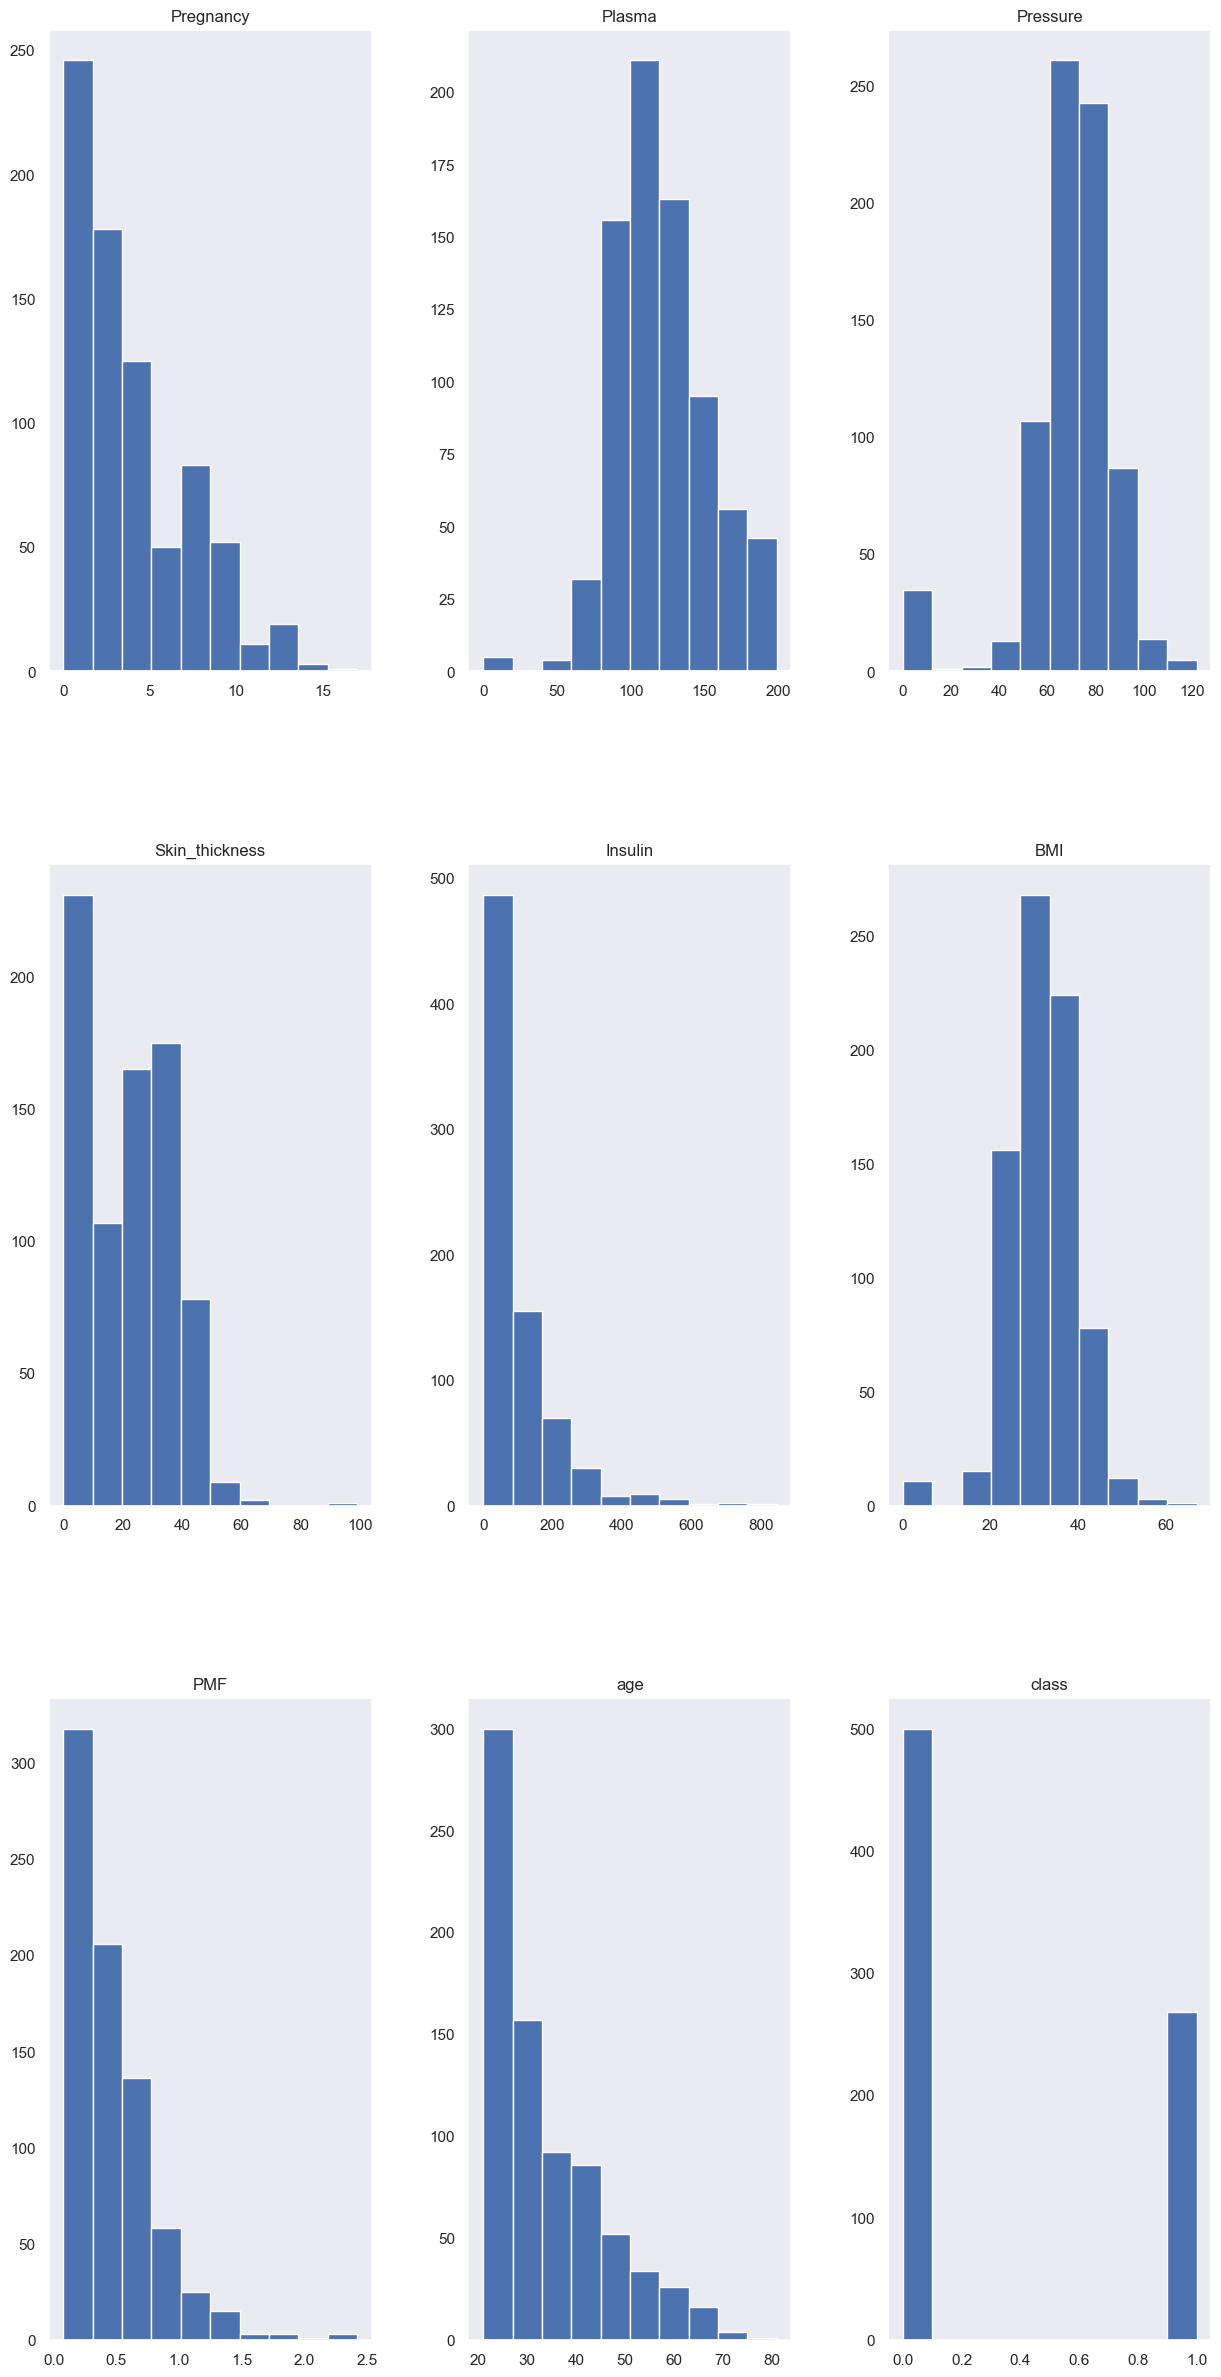

In [34]:
df.hist(figsize=(15,30), sharex=False, sharey=False, grid=False)
plt.show()

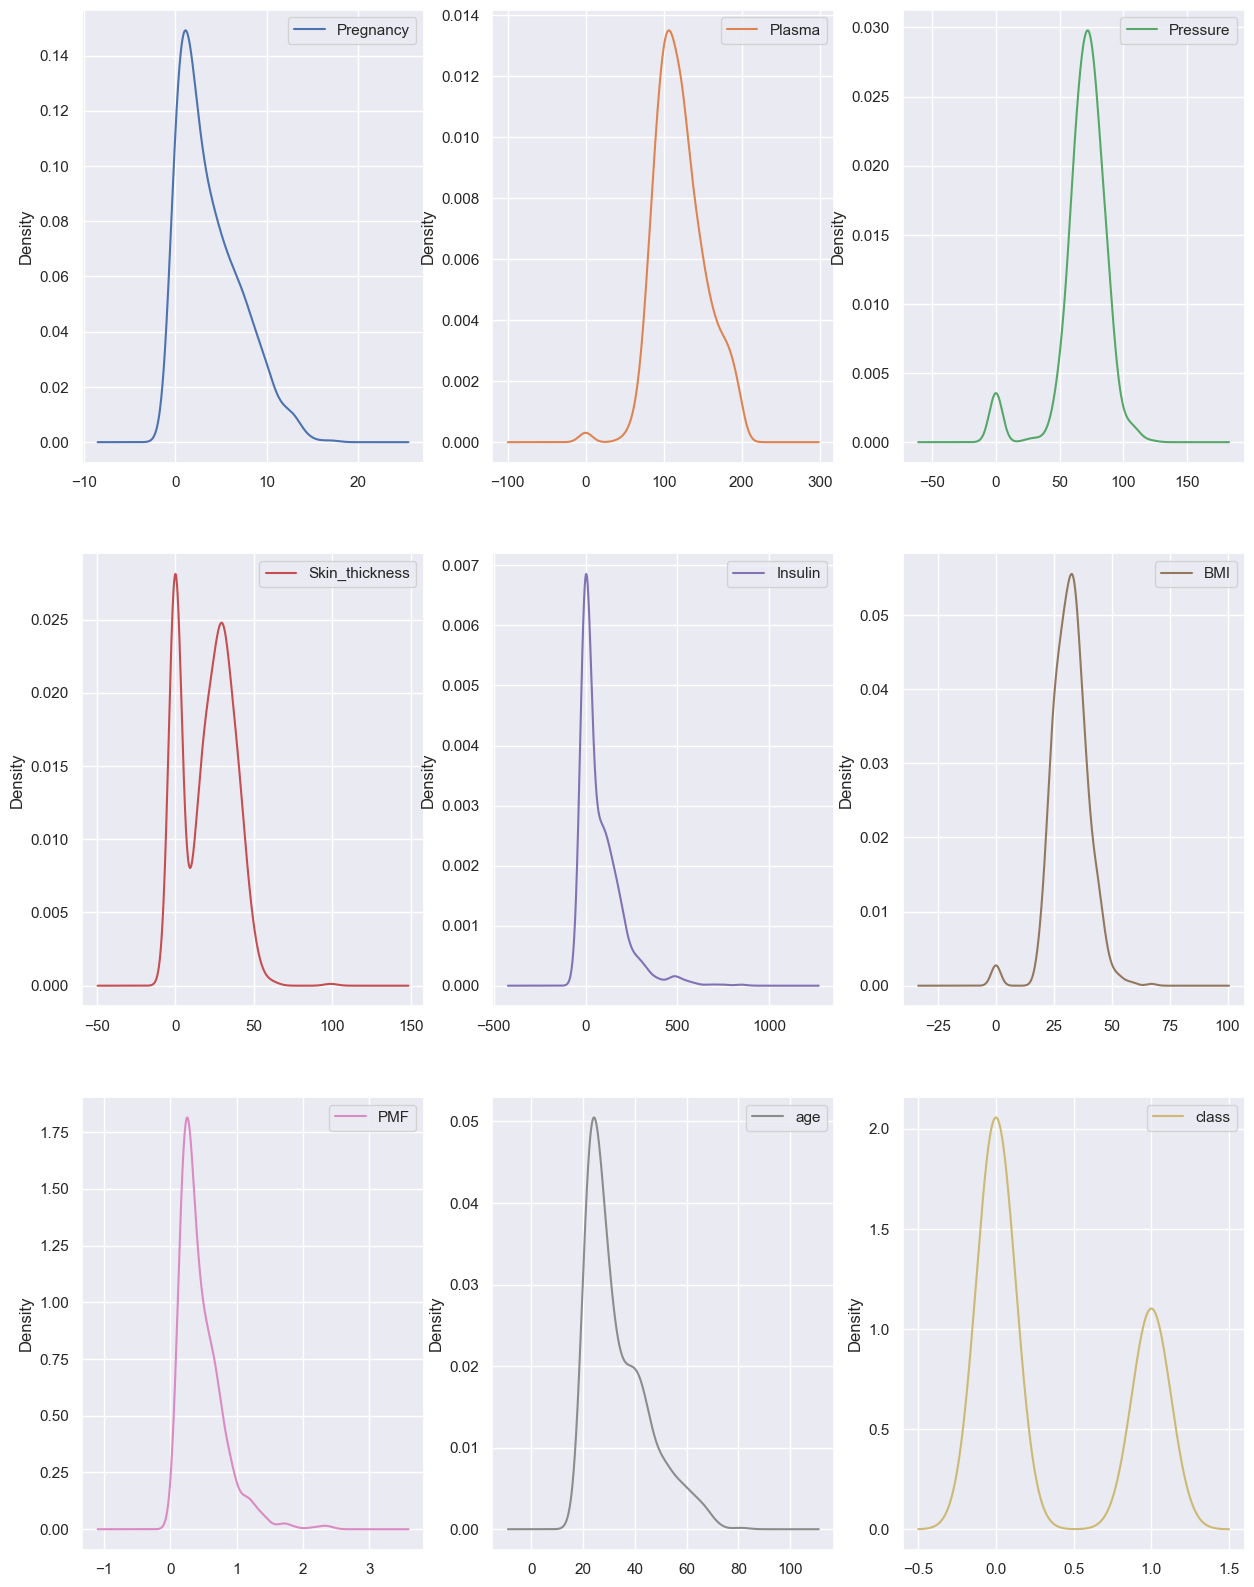

In [38]:
df.plot(kind="density", subplots=True, sharex=False, sharey=False,layout=(3,3), figsize=(15,20))
plt.show()

In [39]:
df.skew()
## df.skew().abs().sort_values(ascending=False)
## Highest skewness is in Insulin folloed by PMF, Pressure..Insulin and PMF are positively skewed 
## whereas Pressure is negatively skewed

Pregnancy         0.901674
Plasma            0.173754
Pressure         -1.843608
Skin_thickness    0.109372
Insulin           2.272251
BMI              -0.428982
PMF               1.919911
age               1.129597
class             0.635017
dtype: float64

# Bivariate Analysis

<Axes: >

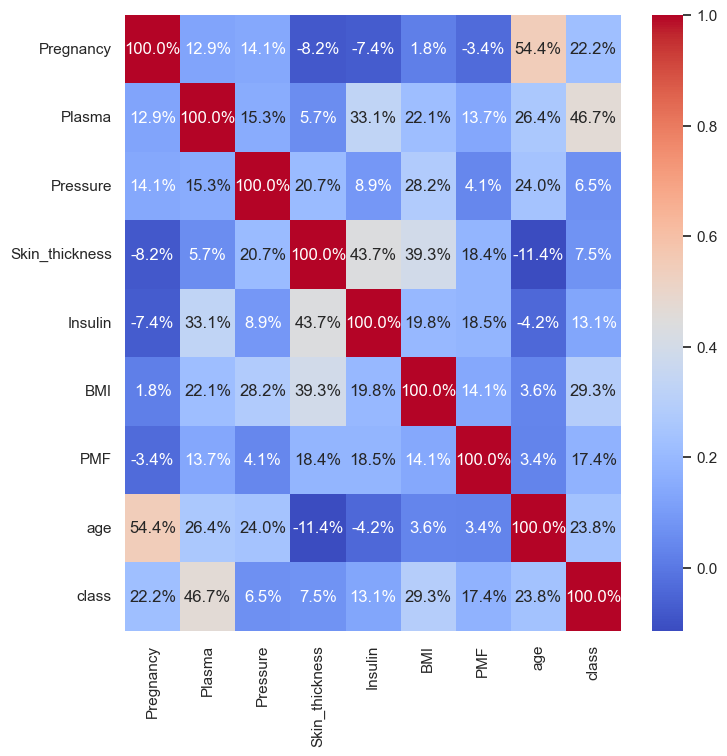

In [6]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, fmt=".1%",cmap="coolwarm")
## Class variable has highest correlation with Plasma but the relationship is moderate

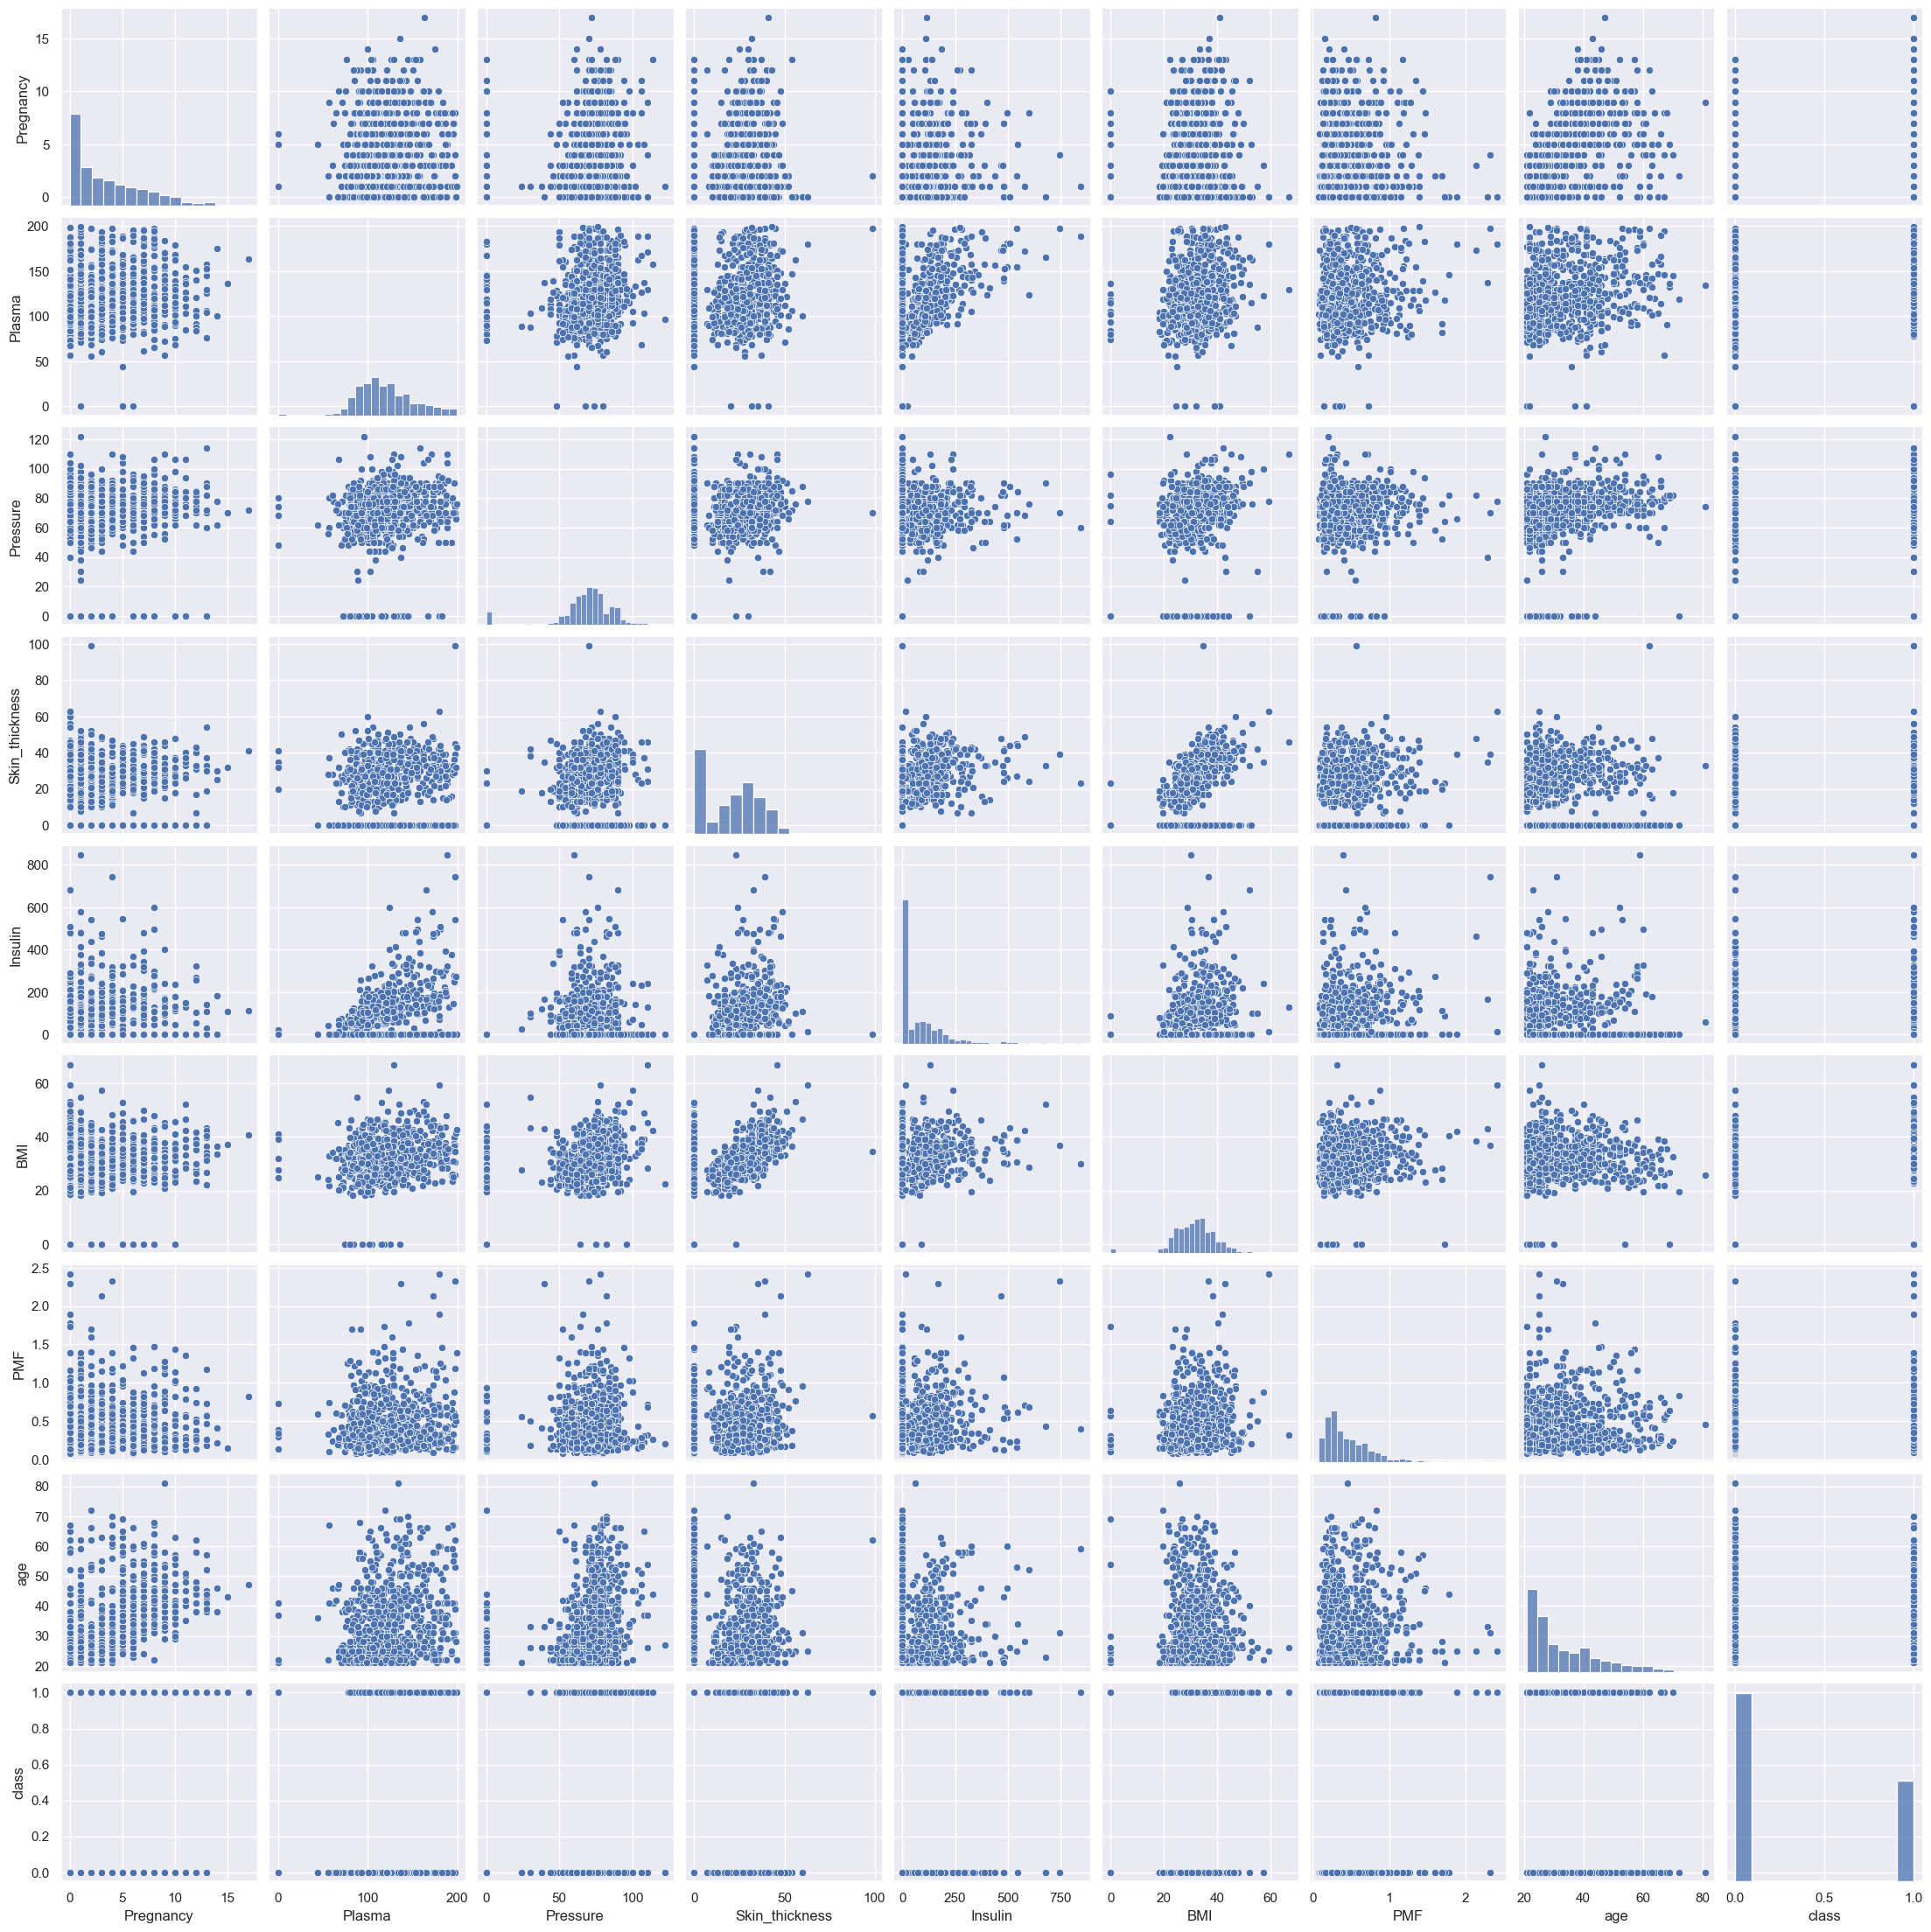

In [50]:
sns.pairplot(df)
plt.show()

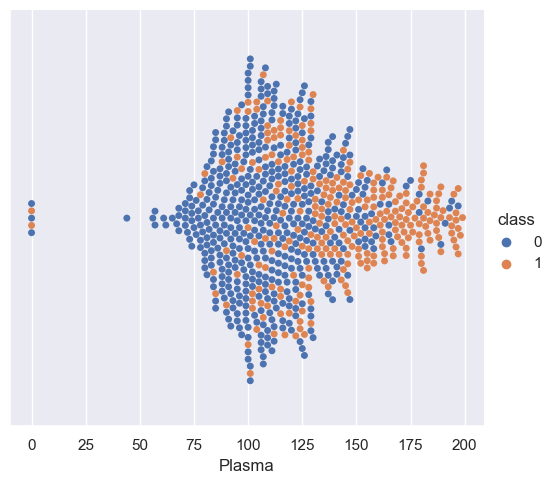

In [10]:
sns.catplot(x="Plasma",hue="class", data=df,kind="swarm")
plt.show()
## People with higher plasma has higher chances of being diabetic

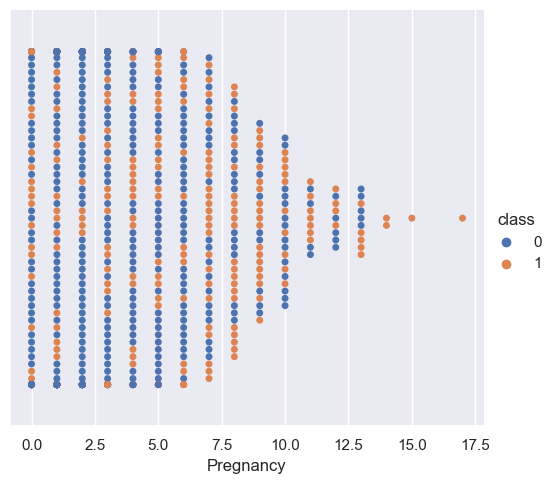

In [26]:
sns.catplot(x="Pregnancy",hue="class", data=df,kind="swarm")
plt.show()

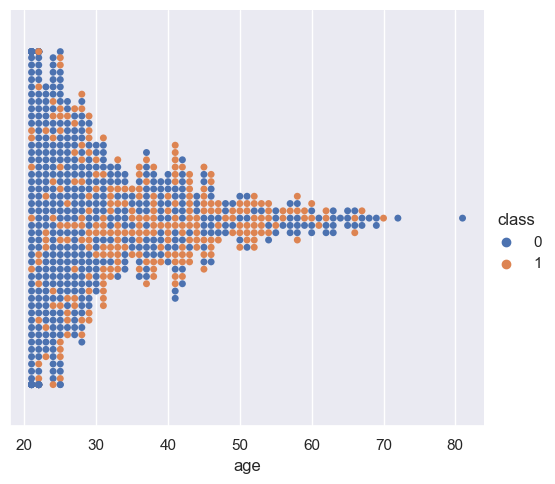

In [37]:
sns.catplot(x="age", hue="class", data=df,kind="swarm")
plt.show()

# Handling Outliers

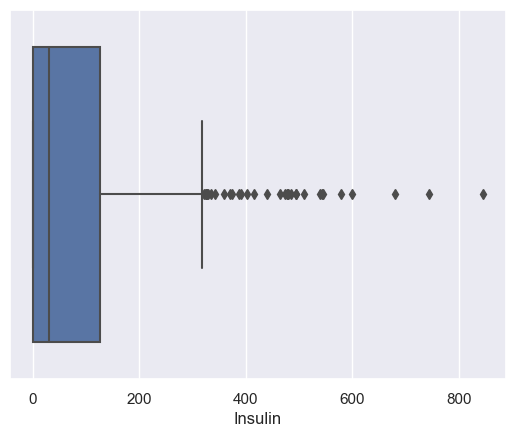

In [38]:
sns.boxplot(x="Insulin", data=df)
plt.show()

In [39]:
def hand_outliers(col):
    q1, q3=col.quantile([0.25,0.75])
    IQR=q3-q1
    lower_limit=q1-(1.5*IQR)
    upper_limit=q3+(1.5*IQR)
    return lower_limit, upper_limit

In [40]:
insulin_llimit, insulin_ulimit=hand_outliers(df["Insulin"])
df["Insulin"]=np.where(df["Insulin"]>insulin_ulimit,insulin_ulimit,df["Insulin"])
df["Insulin"]=np.where(df["Insulin"]<insulin_llimit,insulin_llimit,df["Insulin"])

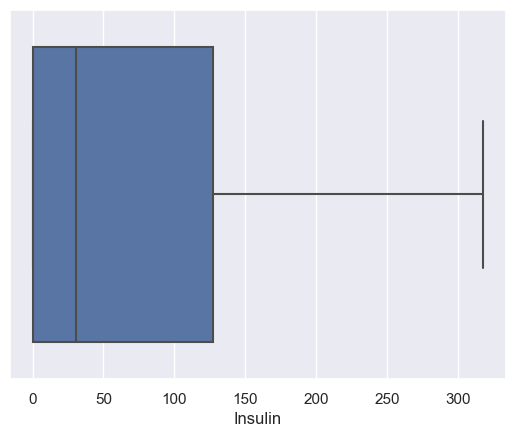

In [41]:
sns.boxplot(x="Insulin", data=df)
plt.show()

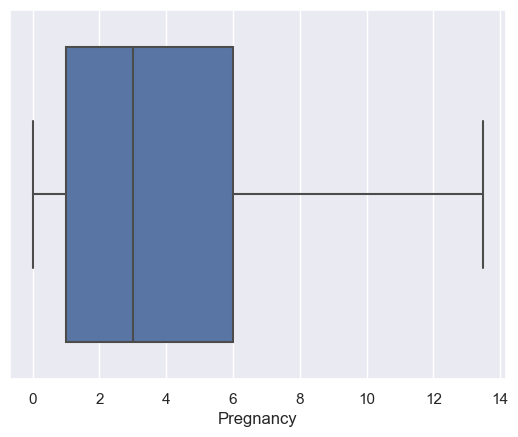

In [66]:
sns.boxplot(x="Pregnancy", data=df)
plt.show()

In [43]:
Pregnancy_llimit, Pregnancy_ulimit=hand_outliers(df["Pregnancy"])
df["Pregnancy"]=np.where(df["Pregnancy"]>Pregnancy_ulimit,Pregnancy_ulimit,df["Pregnancy"])
df["Pregnancy"]=np.where(df["Pregnancy"]<Pregnancy_llimit,Pregnancy_llimit,df["Pregnancy"])

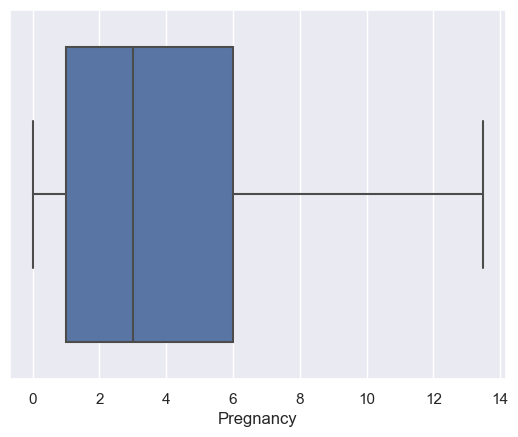

In [67]:
sns.boxplot(x="Pregnancy", data=df)
plt.show()

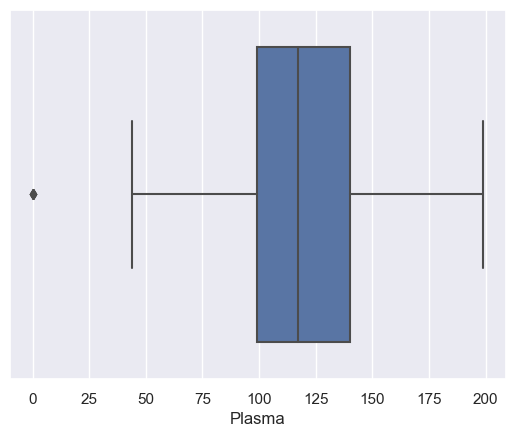

In [45]:
sns.boxplot(x="Plasma", data=df)
plt.show()

In [46]:
Plasma_llimit, Plasma_ulimit=hand_outliers(df["Plasma"])
df["Plasma"]=np.where(df["Plasma"]>Plasma_ulimit,Plasma_ulimit,df["Plasma"])
df["Plasma"]=np.where(df["Plasma"]<Plasma_llimit,Plasma_llimit,df["Plasma"])

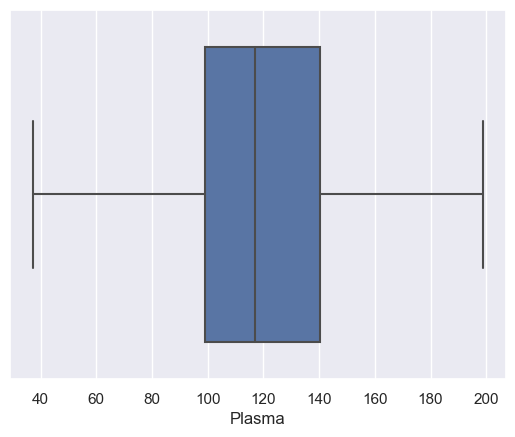

In [47]:
sns.boxplot(x="Plasma", data=df)
plt.show()

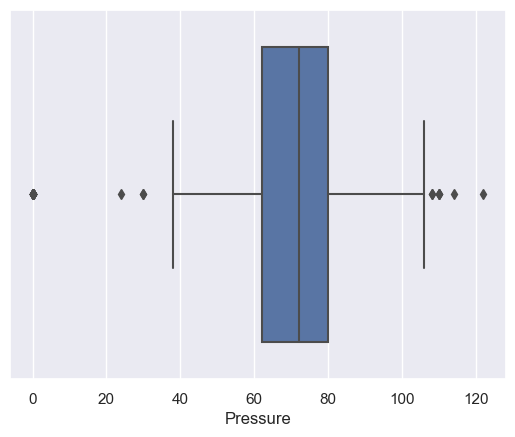

In [49]:
sns.boxplot(x="Pressure", data=df)
plt.show()

In [50]:
Pressure_llimit, Pressure_ulimit=hand_outliers(df["Pressure"])
df["Pressure"]=np.where(df["Pressure"]>Pressure_ulimit,Pressure_ulimit,df["Pressure"])
df["Pressure"]=np.where(df["Pressure"]<Pressure_llimit,Pressure_llimit,df["Pressure"])

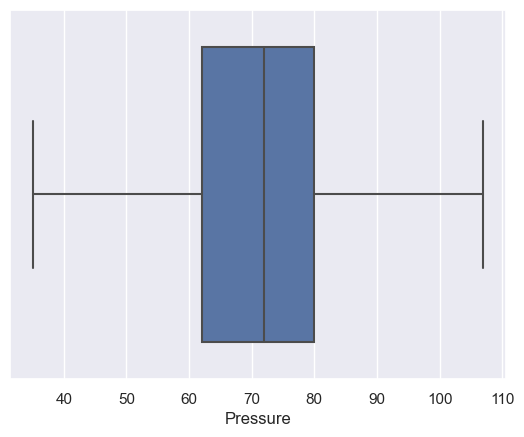

In [51]:
sns.boxplot(x="Pressure", data=df)
plt.show()

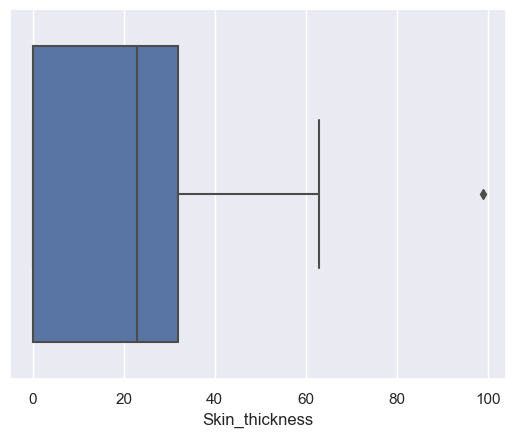

In [52]:
sns.boxplot(x="Skin_thickness", data=df)
plt.show()

In [53]:
Skin_thickness_llimit, Skin_thickness_ulimit=hand_outliers(df["Skin_thickness"])
df["Skin_thickness"]=np.where(df["Skin_thickness"]>Skin_thickness_ulimit,Skin_thickness_ulimit,df["Skin_thickness"])
df["Skin_thickness"]=np.where(df["Skin_thickness"]<Skin_thickness_llimit,Skin_thickness_llimit,df["Skin_thickness"])

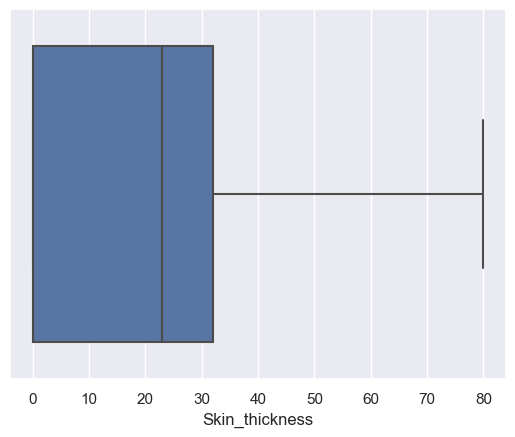

In [54]:
sns.boxplot(x="Skin_thickness", data=df)
plt.show()

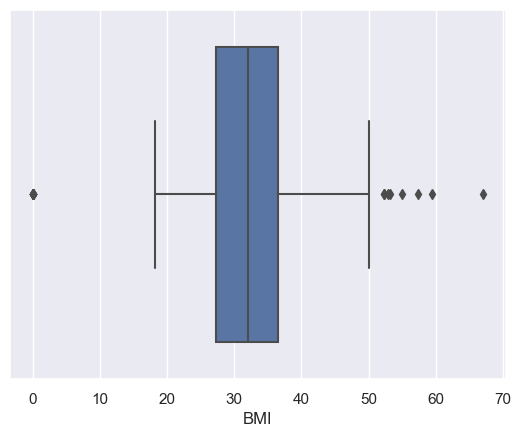

In [55]:
sns.boxplot(x="BMI", data=df)
plt.show()

In [56]:
BMI_llimit, BMI_ulimit=hand_outliers(df["BMI"])
df["BMI"]=np.where(df["BMI"]>BMI_ulimit,BMI_ulimit,df["BMI"])
df["BMI"]=np.where(df["BMI"]<BMI_llimit,BMI_llimit,df["BMI"])

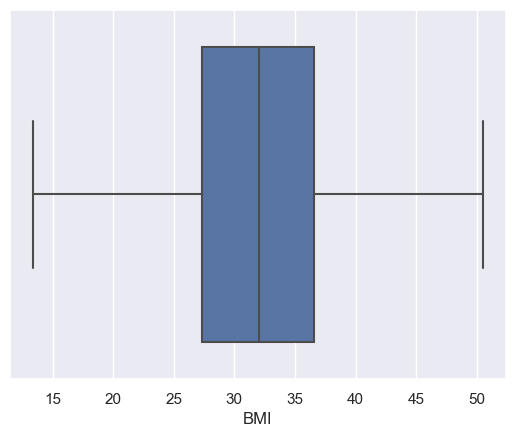

In [57]:
sns.boxplot(x="BMI", data=df)
plt.show()

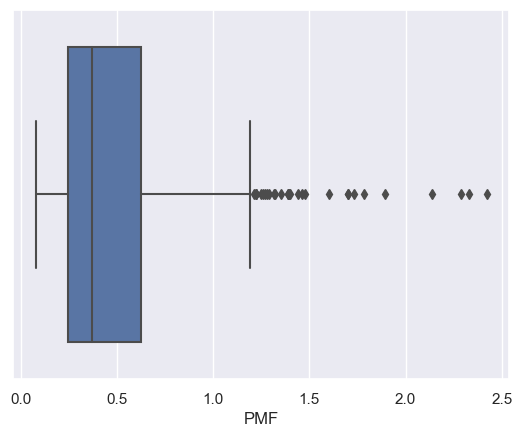

In [58]:
sns.boxplot(x="PMF", data=df)
plt.show()

In [59]:
PMF_llimit, PMF_ulimit=hand_outliers(df["PMF"])
df["PMF"]=np.where(df["PMF"]>PMF_ulimit,PMF_ulimit,df["PMF"])
df["PMF"]=np.where(df["PMF"]<PMF_llimit,PMF_llimit,df["PMF"])

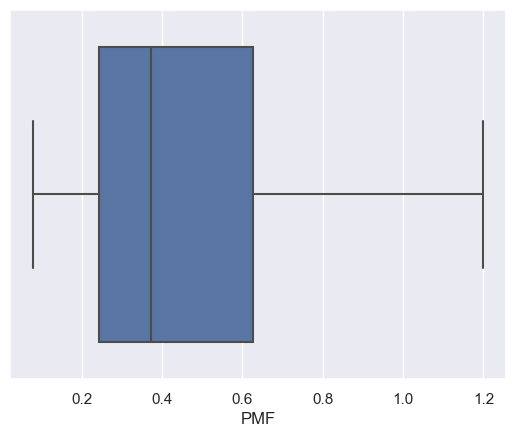

In [60]:
sns.boxplot(x="PMF", data=df)
plt.show()

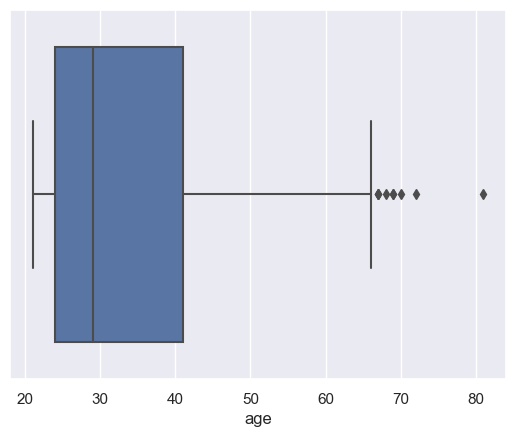

In [61]:
sns.boxplot(x="age", data=df)
plt.show()

In [62]:
age_llimit, age_ulimit=hand_outliers(df["age"])
df["age"]=np.where(df["age"]>age_ulimit,age_ulimit,df["age"])
df["age"]=np.where(df["age"]<age_llimit,age_llimit,df["age"])

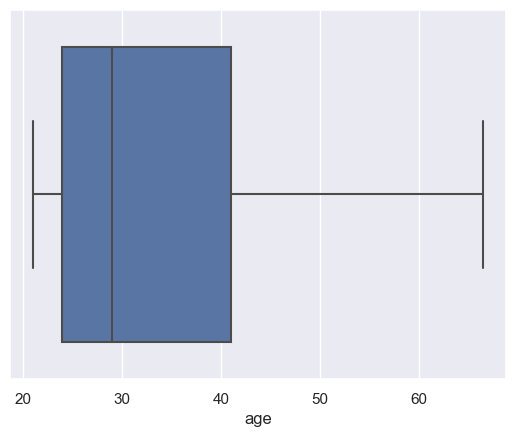

In [63]:
sns.boxplot(x="age", data=df)
plt.show()

array([[<Axes: title={'center': 'Pregnancy'}>,
        <Axes: title={'center': 'Plasma'}>,
        <Axes: title={'center': 'Pressure'}>],
       [<Axes: title={'center': 'Skin_thickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'PMF'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'class'}>]], dtype=object)

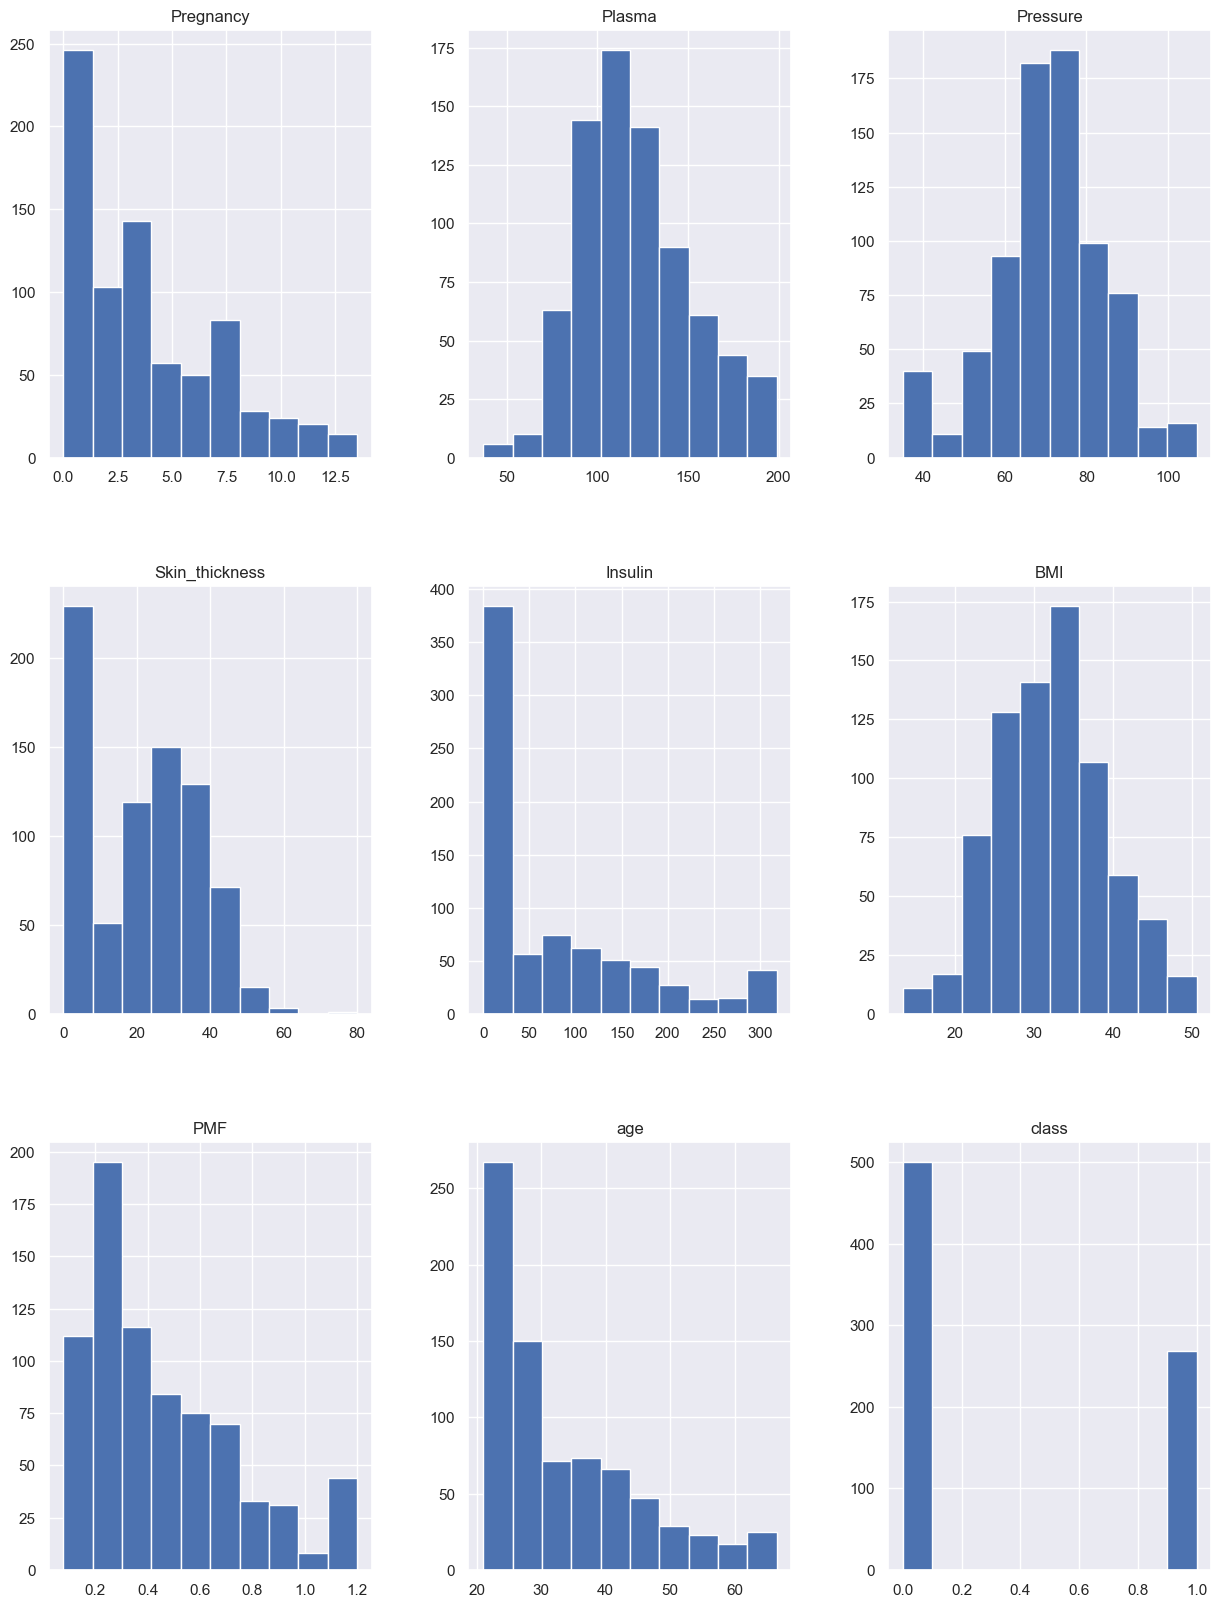

In [68]:
df.hist(figsize=(15,20))

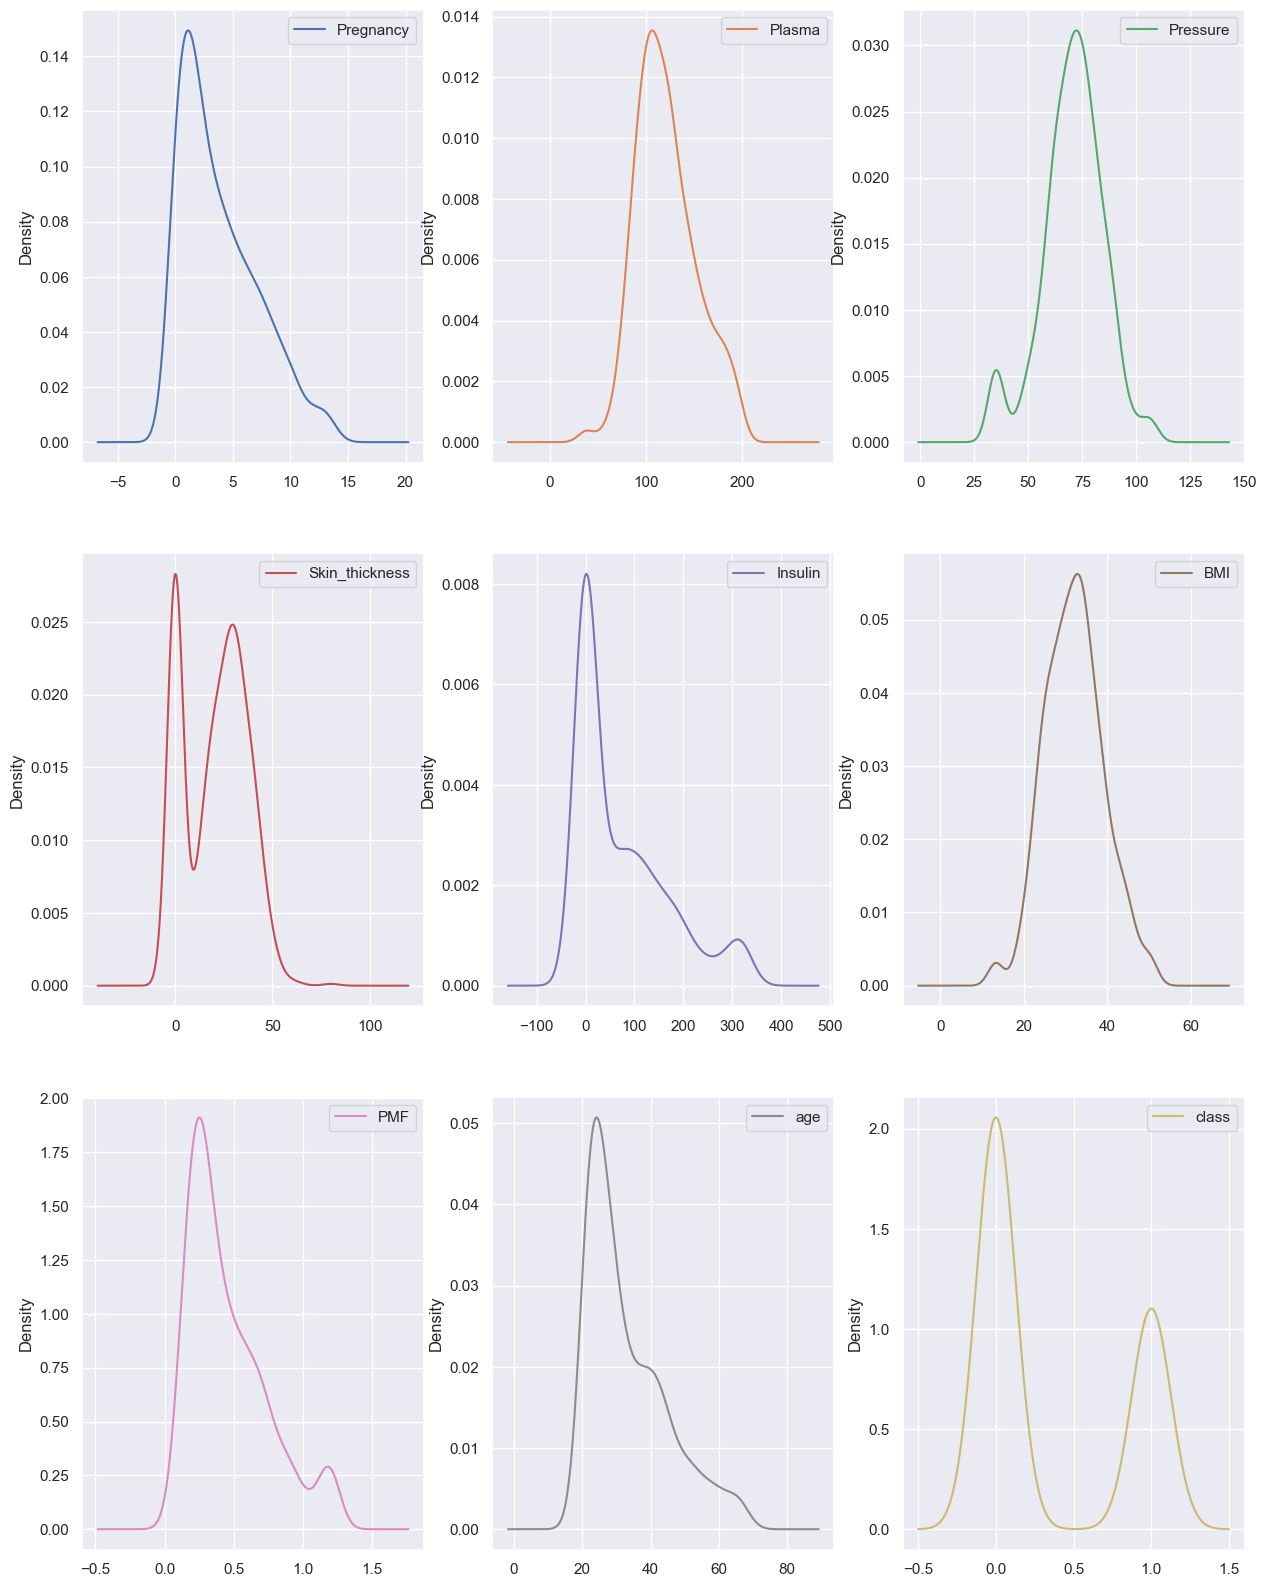

In [74]:
df.plot(kind="density", layout=(3,3),sharex=False,sharey=False,figsize=(15,20),subplots=True)
plt.show()

In [75]:
df.dtypes

Pregnancy         float64
Plasma            float64
Pressure          float64
Skin_thickness    float64
Insulin           float64
BMI               float64
PMF               float64
age               float64
class               int64
dtype: object

### Label Encoding or one hot encoding is not needed as there is no categorical column in data

In [76]:
X=df.drop("class", axis=1)

In [95]:
Y=df["class"].values

In [89]:
from sklearn.model_selection import train_test_split

In [96]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [98]:
from sklearn.linear_model import LogisticRegression

In [113]:
lr=LogisticRegression()

In [114]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [116]:
lr.score(X_train,Y_train)*100

79.88826815642457

In [117]:
lr.score(X_test,Y_test)

0.7229437229437229